# Graph Cellular Automata

<hr>

- Graph Cellular Automata on Dynamic Random Digraphs
- Hamming Distance and Other Binary Similarity Measures
- Average Cell Entropy and Average Mutual Information

<hr>


In [31]:
import os
import sys
import math
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

import pyglet
import cellpylib as cpl
import random as rnd

from graph_cellular_automata import *
from random_digraphs import *
from utils import *



## Graph Cellular Automata on Dynamic Random Digraphs


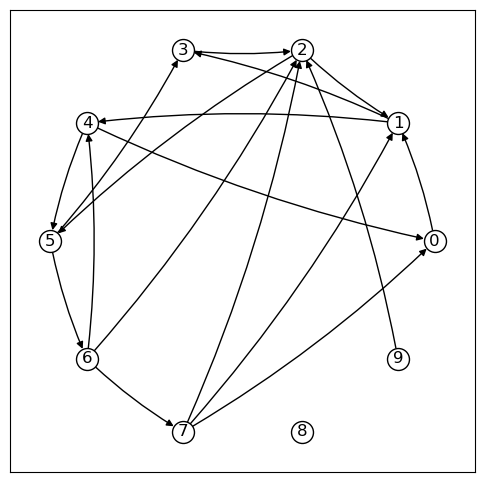

In [50]:
#Simple example

M = directed_erdos_renyi_GnM_model(12, 24, weight=False)
M = remove_double_edges(M1) #Remove double edges.

G = nx.from_numpy_matrix(M, create_using=nx.DiGraph())
plt.figure(3,figsize=(6,6)) #, dpi=300)
nx.draw_networkx(G, pos=nx.circular_layout(G), node_color="#ffffff", node_size=250, 
        connectionstyle='arc3, rad = 0.06', with_labels=True, edgecolors='black')

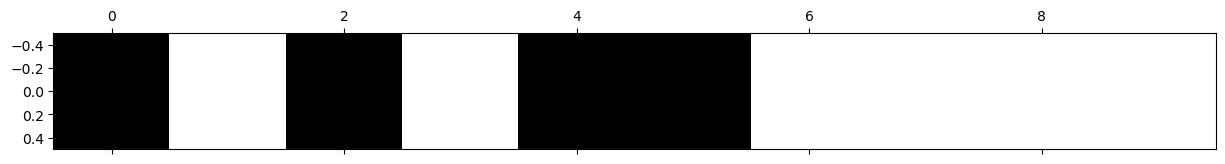

In [49]:
Run_GCA_in_neighborhood([M])

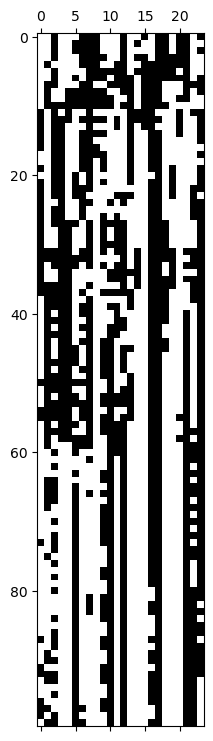

In [33]:
#Dynamic random model

ER = directed_erdos_renyi_GnM_model(24, 140)
D_er = dynamic_random_digraph_model(ER, 0.96, 0.001, 100)

Run_GCA_in_neighborhood(D_er)

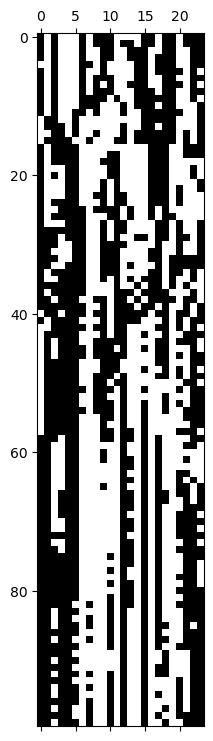

In [34]:
Run_GCA_out_neighborhood(D_er)

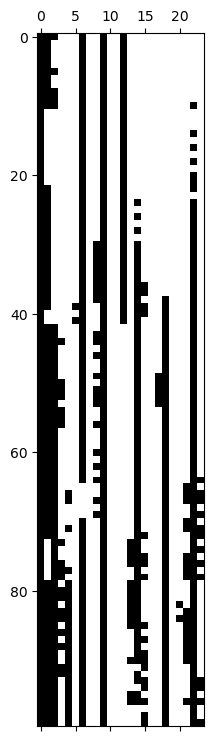

In [35]:
BA = directed_barabasi_albert_model(24, 0.9, 0.06, 0.04, 0.3, 0.3)
D_ba = dynamic_random_digraph_model(BA, 0.96, 0.001, 100)

Run_GCA_in_neighborhood(D_ba)

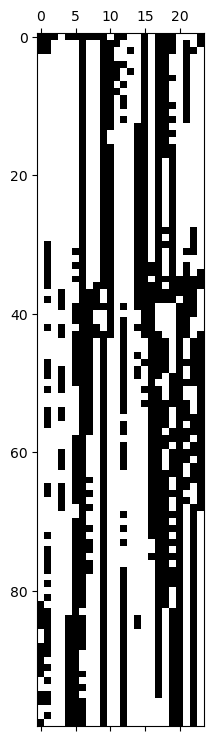

In [36]:
WS = directed_watts_strogatz_model(24, 8, 0.7)
D_ws = dynamic_random_digraph_model(WS, 0.96, 0.001, 100)

Run_GCA_in_neighborhood(D_ws)

## Normalized Hamming Distance and other Binary Similarity Measures

In [37]:

def normalized_hamming_distance(seq1, seq2):
    '''Returns the normalized Hamming distance between two binary sequences.
    Parameters
    ----------
    seq1, seq2: (array) binary sequences.
    '''
    if len(seq1) != len(seq2):
        raise ValueError("Sequences must be of equal length.")
        
    N = len(seq1)
    dist_counter = 0
    for n in range(len(seq1)):
        if seq1[n] != seq2[n]:
            dist_counter += 1
    return dist_counter/N


In [38]:
s1 = Run_GCA_in_neighborhood(D_er, output="binary")
s2 = Run_GCA_in_neighborhood(D_ws, output="binary")

normalized_hamming_distance(s1[0], s2[0])

0.375

## Average Cell Entropy and Average Mutual Information

In [39]:
cpl.average_cell_entropy(Run_GCA_in_neighborhood(D_er, output="binary"))

0.788972322956084

In [40]:
cpl.average_cell_entropy(Run_GCA_in_neighborhood(D_ws, output="binary"))

0.7206634794805202

In [41]:
cpl.average_cell_entropy(Run_GCA_in_neighborhood(D_ba, output="binary"))

0.44933953671031607

In [43]:
cpl.average_mutual_information(Run_GCA_in_neighborhood(D_er, output="binary"))

0.24693797367907033

In [44]:
cpl.average_mutual_information(Run_GCA_in_neighborhood(D_ws, output="binary"))

0.30282800818244965

In [45]:
cpl.average_mutual_information(Run_GCA_in_neighborhood(D_ba, output="binary"))

0.20421435503230226